# A3 BIG DATA

## Premissa

Fomos contratados por uma empresa varejista de roupas para alavancar suas vendas. Ela nos ofereceu o seu registro de vendas, disponível em formato CSV e nos solicitou em retorno a criação de uma estratégia de marketing e um mapeamento mais específico de seu público alvo (persona) atualmente

## Objetivos da estratégia de marketing:

- Satisfação do cliente
- Quantidade de produtos vendidos em cada marca
- Lucro líquido (com desconto aplicado)
- Encontar carro chefe de vendas
- Encontrar temporada preferida do publico alvo
- Encontrar gênero que é mais atendido
- Encontar material mais vendido

marcas_populares = [
    "Adidas",
    "Lupo",
    "Mizuno",
    "Mormaii",
    "Fila",
    "Zorba",
    "Menina Linda",
    "MultiMarcas",
    "Stillger Jeans",
    "Mash",
    "Keeper",
    "Almix",
    "Imperio Kids",
    "AMANDIKA KIDS",
    "Levi's",
    "Slim Fitness",
    "New Era",
    "Paraíso da Lingerie",
    "Importado",
    "Genérica",
    "Olympikus",
    "Puma",
    "Under Armour"
]:

## Instalar depdendências

In [1]:
# Instalar dependências
get_ipython().system_raw('pip install pandas')
get_ipython().system_raw('pip install findspark')
get_ipython().system_raw('pip install matplotlib')
get_ipython().system_raw('pip install squarify')
get_ipython().system_raw('pip install loguru')

/home/thiago/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:2607: UserWarning: You executed the system command !pip which may not work as expected. Try the IPython magic %pip instead.
  warnings.warn(


# Configurações iniciais - tratar xlsx para criar um .csv

In [2]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "./spark-3.1.2-bin-hadoop2.7"
import findspark
findspark.init()
from pyspark.sql import SparkSession
import pandas as pd
from loguru import logger

spark = SparkSession.builder.appName(
    'A3 Análise de dados e Big Data').getOrCreate()

roupas = spark.read.csv(path='./data/clothes_db.csv', sep=',')
roupas = roupas.fillna("Sem avaliação")
logger.info("Configuração pronta!")

23/10/08 21:52:00 WARN Utils: Your hostname, W10-tks resolves to a loopback address: 127.0.1.1; using 172.25.91.212 instead (on interface eth0)
23/10/08 21:52:00 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
23/10/08 21:52:01 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
2023-10-08 21:52:20.128 | INFO     | __main__:<module>:15 - Configuração pronta!


## Tratamento de dados - renomear colunas

In [22]:
roupasColNames = [
    'titulo', 
    'preco_original', 
    'desconto_percentual', 
    'preco_com_desconto', 
    'quantidade_vendida', 
    'marca', 
    'material',
    'genero',
    'temporada',
    'nota_satisfacao',
    'quantidade_avals'
]
for index, colname in enumerate(roupasColNames):
    roupas = roupas.withColumnRenamed(f"_c{index}", colname)
roupas.printSchema()
roupas.select("*").where(roupas.quantidade_vendida >= 1000).show(999999)

root
 |-- titulo: string (nullable = false)
 |-- preco_original: string (nullable = false)
 |-- desconto_percentual: string (nullable = false)
 |-- preco_com_desconto: string (nullable = false)
 |-- quantidade_vendida: string (nullable = false)
 |-- marca: string (nullable = false)
 |-- material: string (nullable = false)
 |-- genero: string (nullable = false)
 |-- temporada: string (nullable = false)
 |-- nota_satisfacao: string (nullable = false)
 |-- quantidade_avals: string (nullable = false)



+--------------------+--------------+-------------------+------------------+------------------+--------------------+--------------------+-------------------+--------------------+---------------+----------------+
|              titulo|preco_original|desconto_percentual|preco_com_desconto|quantidade_vendida|               marca|            material|             genero|           temporada|nota_satisfacao|quantidade_avals|
+--------------------+--------------+-------------------+------------------+------------------+--------------------+--------------------+-------------------+--------------------+---------------+----------------+
|Pijama Cirurgico ...|      R$ 69.90|                 0%|          R$ 69.90|              1000|TORONTO UNIFORMES...|           Poliéster|         Sem gênero|                 N/A|              4|             273|
|Kit 10 Cuecas Box...|     R$ 274.81|                18%|         R$ 232.89|             10000|                Lupo|             Algodão|          Mascu

In [26]:
import pyspark.sql
from pyspark.sql.functions import col

def pega_vendas_da_marca(company_name:str) -> pyspark.sql.dataframe.DataFrame :
    return roupas.select("*").where(col("marca").contains(company_name))

def salvar_csv_marcas_populares(path:str) -> None:
    (dados_marcas_populares.toPandas()).to_csv(path)
    
path = "./data/db_tratado.csv"

marcas_populares = [
    "adidas",
    "Lupo",
    "Mizuno",
    "Mormaii",
    "Fila",
    "Zorba",
    "Menina Linda",
    "MultiMarcas",
    "Stillger Jeans",
    "Mash",
    "Keeper",
    "Almix",
    "Imperio Kids",
    "AMANDIKA KIDS",
    "Levi's",
    "Slim Fitness",
    "New Era",
    "Paraíso da Lingerie",
    "Importado",
    "Genérica",
    "Olympikus",
    "Puma",
    "Under Armour"
]
vendas_marcas_populares = {
    marca: pega_vendas_da_marca(marca) for marca in marcas_populares
}
dados_marcas_populares = vendas_marcas_populares["adidas"]

for marca in marcas_populares[1:]:
    dados_marcas_populares  = dados_marcas_populares.union(vendas_marcas_populares[marca])
    
salvar_csv_marcas_populares(path)
logger.info(f"CSV salvo em {path}")

2023-10-08 22:30:15.326 | INFO     | __main__:<module>:46 - CSV salvo em ./data/db_tratado.csv


2023-10-08 22:30:23.263 | DEBUG    | __main__:<module>:24 - Valores_y - grafico qtd/marca: [1160.0, 292032.0, 4.0, 10.0, 5.0, 288335.0, 8643.0, 53925.0, 20105.0, 75583.0, 40909.0, 81000.0, 34685.0, 60000.0, 2661.0, 2000.0, 1.0, 7205.0, 3507.0, 43590.0, 130.0, 1008.0, 8.0]


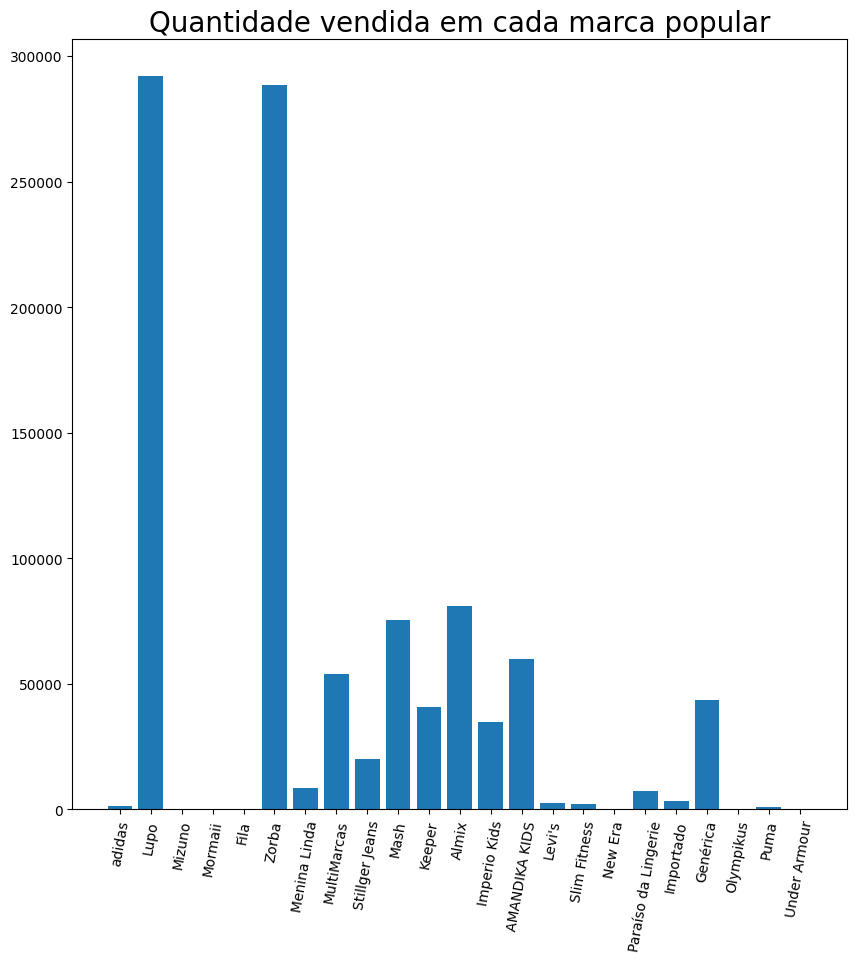

In [27]:
from matplotlib import pyplot as plt

def soma_qtd_vendida(marca:str) -> float:
    return sum([
        float(row[0]) for row in
        vendas_marcas_populares[marca].select("quantidade_vendida").collect()
    ])

def monta_grafico_barra(x,y, titulo:str) -> None:
    plt.figure(figsize=(10,10))
    plt.title(titulo, fontsize=20)
    plt.bar(x,y)
    plt.xticks(rotation=80)
    plt.show()

vendas_marcas = {
    marca: pega_vendas_da_marca(marca) for marca in marcas_populares
}

valores_y = [
    soma_qtd_vendida(marca) for marca in vendas_marcas_populares
]
valores_y
logger.debug("Valores_y - grafico qtd/marca: " + str(valores_y))
monta_grafico_barra(marcas_populares, valores_y, "Quantidade vendida em cada marca popular")


In [79]:
import matplotlib
import squarify

# COMPARAÇÃO DO LUCRO LÍQUIDO DE CADA LOJA
# Pra fazer esse gráfico, o tamanho dos retânglos 
# precisam ser porcentagens com relação ao preço máximo
# do dataset

# pra ter uma lista de lucros, eu preciso multiplicar o valor com desconto com a quantidade, dai somar esses valores de cada marca
lista_vendas = [
    round(sum([
        (float(row[0].replace("R$ ", "")) * float(row[1]) ) for row in
        vendas_marcas_populares[marca].select("preco_com_desconto", "quantidade_vendida" ).collect()
    ]),2) for marca in vendas_marcas_populares
]
logger.debug(f"lista_vendas: {lista_vendas}")

lista_de_porcentagens = [
    round((item*100)/max(lista_vendas),2) for item in
    lista_vendas
]
logger.debug(f"lista_de_porcentagens: {lista_de_porcentagens}")

legendas = [
    (marcas_populares[index]  + "\n" if float(lista_de_porcentagens[index]) > 1 else "") +
    ("("+ str(lista_de_porcentagens[index]) + "%)" if float(lista_de_porcentagens[index]) > 1 else "" ) for (index,item) in
    enumerate(marcas_populares)
]


cmap = matplotlib.cm.BuPu
maxi = max(lista_vendas)
norm = matplotlib.colors.Normalize(vmin=40, vmax=maxi)
colors = [cmap(norm(i)) for i in lista_vendas]

plt.figure(figsize=(10,10))
grafico = squarify.plot(sizes=lista_vendas, label=legendas, color=colors)
plt.axis('off');
plt.title('Comparação de lucros de cada marca', fontsize=20)
plt.tight_layout()

2023-10-08 23:17:22.896 | DEBUG    | __main__:<module>:16 - lista_vendas: [207037.9, 33844741.46, 489.96, 510.95, 767.68, 54380476.75, 1010643.81, 9592976.24, 1190971.4, 15574980.4, 2017177.24, 12476300.0, 4892919.95, 8394000.0, 854481.87, 86000.0, 339.99, 379427.95, 336544.73, 1712429.65, 15591.2, 161839.92, 1887.84]
2023-10-08 23:17:22.897 | DEBUG    | __main__:<module>:22 - lista_de_porcentagens: [0.38, 62.24, 0.0, 0.0, 0.0, 100.0, 1.86, 17.64, 2.19, 28.64, 3.71, 22.94, 9.0, 15.44, 1.57, 0.16, 0.0, 0.7, 0.62, 3.15, 0.03, 0.3, 0.0]


TypeError: 'str' object is not callable

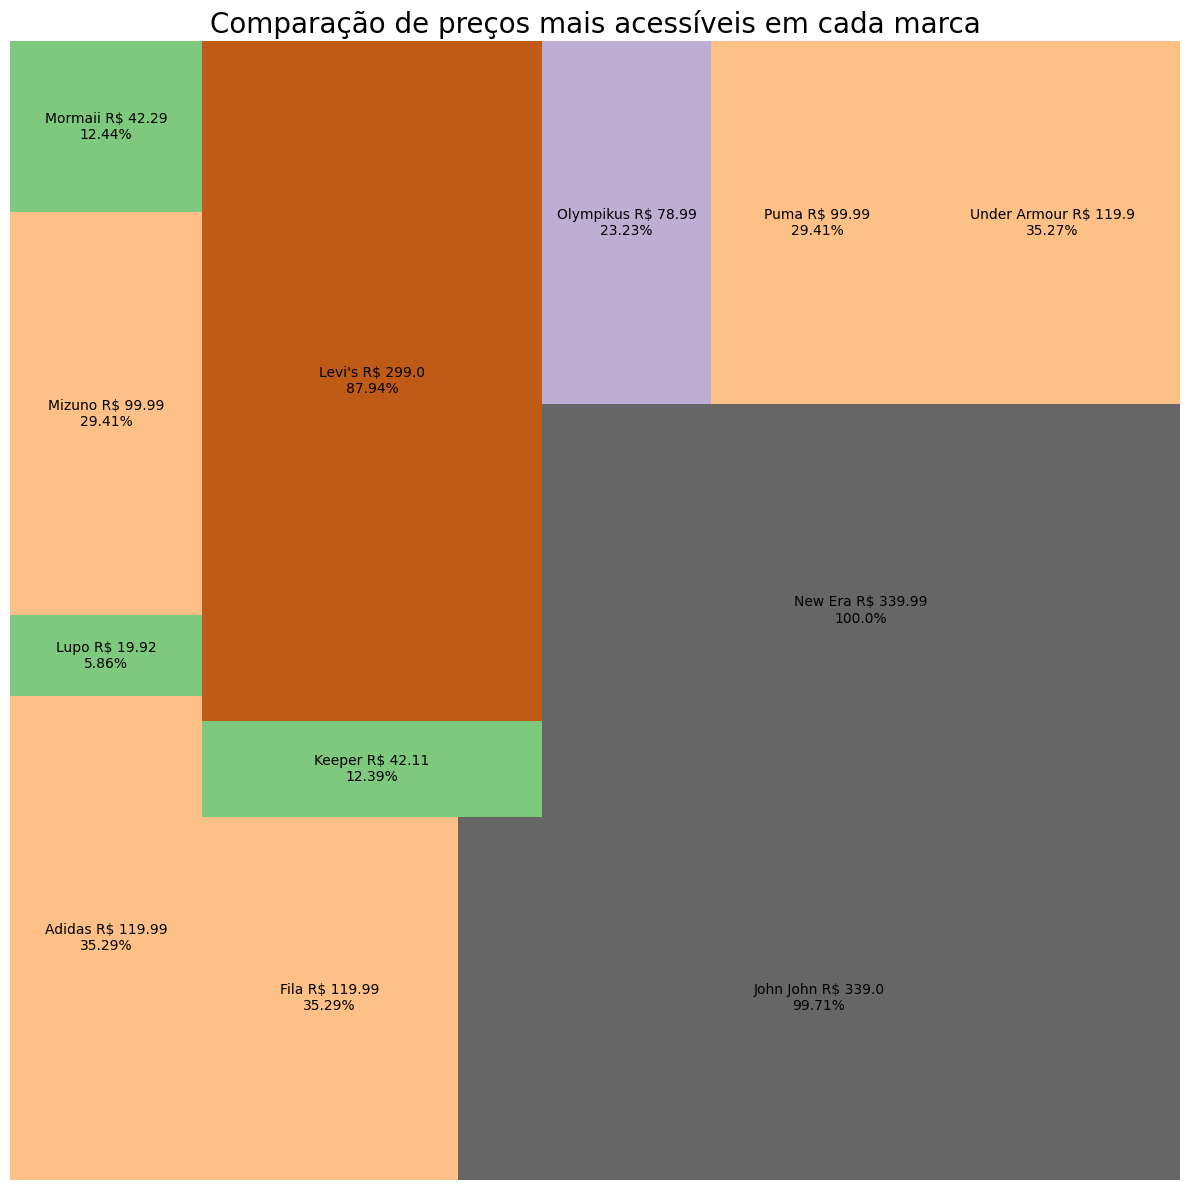

In [ ]:
import matplotlib
import squarify

# COMPARAÇÃO DE PREÇOS DOS ARTIGOS MAIS BARATOS DE CADA LOJA
# Pra azer esse gráfico, o tamanho dos retânglos 
# precisam ser porcentagens com relação ao preço mínimo
# da coluna de desconto

lista_precos = [
    min([
        float(row[0].replace("R$ ", "")) for row in
        vendas_marcas_populares[item].select("preco_com_desconto").collect()
    ]) for item in vendas_marcas_populares
]

lista_de_porcentagens = [
    round((item*100)/max(lista_precos),2) for item in
    lista_precos
]

legendas = [
    marcas[index] +
    " R$ " + str(lista_precos[index])  + "\n" +
    str(lista_de_porcentagens[index]) + "%" for (index,item) in
    enumerate(marcas)
]

# GRÁFICO MONTADO DE MODO AOS MAIS CLAROS REPRESENTAREM OS PREÇOS MAIS ACESSÍVEIS
# E OS ESCUROS OS MAIS CAROS
cmap = matplotlib.cm.Accent
mini = min(lista_precos)
maxi = max(lista_precos)
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(i)) for i in lista_precos]

plt.figure(figsize=(12, 12))
grafico = squarify.plot(sizes=lista_precos, label=legendas, color=colors)
plt.axis('off');
plt.title('Comparação de preços mais acessíveis em cada marca', fontsize=20)
plt.tight_layout()

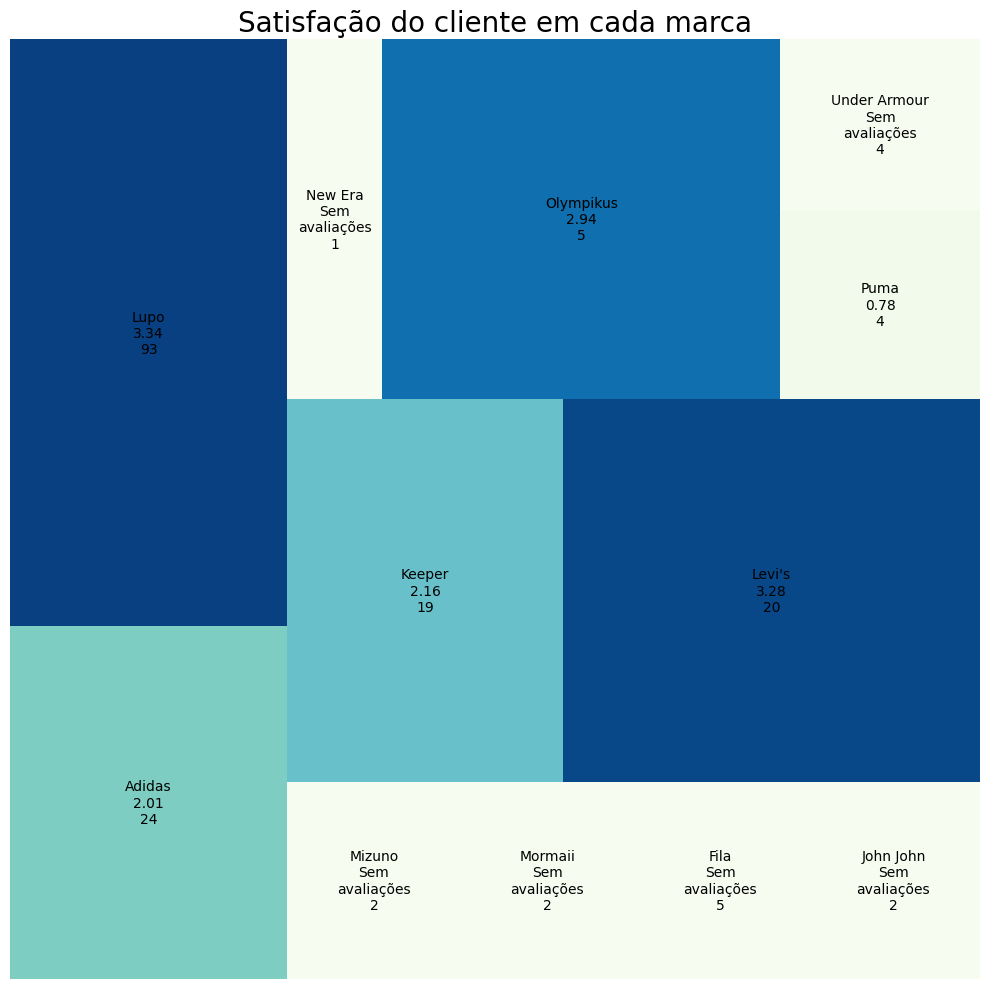

In [ ]:
import matplotlib
import squarify

media_notas = [
    (
        sum([
        (float(row[0]) if row[0] != "Sem avaliação" else 0) for row in
        vendas_marcas_populares[item].select("nota_satisfacao").collect()
    ])/len(vendas_marcas_populares[item].select("nota_satisfacao").collect())
    if   sum([
        (float(row[0]) if row[0] != "Sem avaliação" else 0) for row in
        vendas_marcas_populares[item].select("nota_satisfacao").collect()
    ])/len(vendas_marcas_populares[item].select("nota_satisfacao").collect()) != 0 else 0.7) for item in vendas_marcas_populares
]
valores_x = [
    str(marcas[index]) + "\n" +
    (str(round(media_notas[index],2)) if round(media_notas[index],2)  != 0.7 else "Sem\navaliações") +
    "\n" + str(len(vendas_marcas_populares[item].select("nota_satisfacao").collect()))
    for (index, item) in
    enumerate(marcas)
    
]

# Definindo a paleta de cores para o treemap
cmap = matplotlib.cm.GnBu
mini = min(media_notas)
maxi = max(media_notas)
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(i)) for i in media_notas]

plt.figure(figsize=(10, 10))
squarify.plot(sizes=media_notas, label=valores_x, color=colors);
plt.title('Satisfação do cliente em cada marca', fontsize=20)
plt.axis('off');
plt.tight_layout()

In [ ]:
valores_x = [
    row[0].replace(' ', '') for row in
    roupas.distinct().limit(20).select("gênero").collect()
]
valores_y = [
    float(row[0]) for row in
    roupas.na.drop("any").limit(20).select("n_vendidos_categoria").collect()
]
plt.figure(figsize=(10,10))
plt.title("Quantidade vendida por categorias de moda", fontsize=20)
plt.bar(valores_x, valores_y)
plt.xticks(rotation=80)
plt.show()

In [ ]:
import matplotlib
import squarify
valores_x = [
    row[0].replace(' ', '') for row in
    roupas.distinct().limit(20).select("temporada").collect()
]
valores_y = [
    float(row[0]) for row in
    roupas.na.drop("any").limit(20).select("n_vendidos_categoria").collect()
]
# Definindo a paleta de cores para o treemap
cmap = matplotlib.cm.Blues
maxi = max(valores_y)
norm = matplotlib.colors.Normalize(vmin=0, vmax=maxi)
colors = [cmap(norm(i)) for i in valores_y]

plt.figure(figsize=(10, 10))
plt.title("Quantidade vendida em cada temporada", fontsize=20)
plt.bar(valores_x, valores_y)
plt.show()